In [ ]:
# default_exp data.external

# External data

> Helper functions used to download and extract common time series datasets.

In [ ]:
#export
from tsai.imports import *
from tsai.utils import * 
from tsai.data.validation import *

In [ ]:
#export
import zipfile
import tempfile
try: from urllib import urlretrieve
except ImportError: from urllib.request import urlretrieve
import shutil
from pyunpack import Archive
from scipy.io import arff
from sktime.utils.data_io import load_from_tsfile_to_dataframe

In [ ]:
#export
def decompress_from_url(url, target_dir=None, verbose=False):
    #Download
    try:
        pv("downloading data...", verbose)
        fname = os.path.basename(url)
        tmpdir = tempfile.mkdtemp()
        local_comp_fname = os.path.join(tmpdir, fname)
        urlretrieve(url, local_comp_fname)
        pv("...data downloaded", verbose)
    except:
        shutil.rmtree(tmpdir)
        if verbose: sys.stderr.write("Could not download url. Please, check url.\n")
    
    #Decompress
    try:
        pv("decompressing data...", verbose)
        if not os.path.exists(target_dir): os.makedirs(target_dir)
        Archive(local_comp_fname).extractall(target_dir)
        shutil.rmtree(tmpdir)
        pv("...data decompressed", verbose)
        return target_dir
    except:
        shutil.rmtree(tmpdir)
        if verbose: sys.stderr.write("Could not decompress file, aborting.\n")
        return None

In [ ]:
#export
def get_UCR_univariate_list():
    return [
        'ACSF1', 'Adiac', 'AllGestureWiimoteX', 'AllGestureWiimoteY',
        'AllGestureWiimoteZ', 'ArrowHead', 'Beef', 'BeetleFly', 'BirdChicken',
        'BME', 'Car', 'CBF', 'Chinatown', 'ChlorineConcentration',
        'CinCECGTorso', 'Coffee', 'Computers', 'CricketX', 'CricketY',
        'CricketZ', 'Crop', 'DiatomSizeReduction',
        'DistalPhalanxOutlineAgeGroup', 'DistalPhalanxOutlineCorrect',
        'DistalPhalanxTW', 'DodgerLoopDay', 'DodgerLoopGame',
        'DodgerLoopWeekend', 'Earthquakes', 'ECG200', 'ECG5000', 'ECGFiveDays',
        'ElectricDevices', 'EOGHorizontalSignal', 'EOGVerticalSignal',
        'EthanolLevel', 'FaceAll', 'FaceFour', 'FacesUCR', 'FiftyWords',
        'Fish', 'FordA', 'FordB', 'FreezerRegularTrain', 'FreezerSmallTrain',
        'Fungi', 'GestureMidAirD1', 'GestureMidAirD2', 'GestureMidAirD3',
        'GesturePebbleZ1', 'GesturePebbleZ2', 'GunPoint', 'GunPointAgeSpan',
        'GunPointMaleVersusFemale', 'GunPointOldVersusYoung', 'Ham',
        'HandOutlines', 'Haptics', 'Herring', 'HouseTwenty', 'InlineSkate',
        'InsectEPGRegularTrain', 'InsectEPGSmallTrain', 'InsectWingbeatSound',
        'ItalyPowerDemand', 'LargeKitchenAppliances', 'Lightning2',
        'Lightning7', 'Mallat', 'Meat', 'MedicalImages', 'MelbournePedestrian',
        'MiddlePhalanxOutlineAgeGroup', 'MiddlePhalanxOutlineCorrect',
        'MiddlePhalanxTW', 'MixedShapesRegularTrain', 'MixedShapesSmallTrain',
        'MoteStrain', 'NonInvasiveFetalECGThorax1',
        'NonInvasiveFetalECGThorax2', 'OliveOil', 'OSULeaf',
        'PhalangesOutlinesCorrect', 'Phoneme', 'PickupGestureWiimoteZ',
        'PigAirwayPressure', 'PigArtPressure', 'PigCVP', 'PLAID', 'Plane',
        'PowerCons', 'ProximalPhalanxOutlineAgeGroup',
        'ProximalPhalanxOutlineCorrect', 'ProximalPhalanxTW',
        'RefrigerationDevices', 'Rock', 'ScreenType', 'SemgHandGenderCh2',
        'SemgHandMovementCh2', 'SemgHandSubjectCh2', 'ShakeGestureWiimoteZ',
        'ShapeletSim', 'ShapesAll', 'SmallKitchenAppliances', 'SmoothSubspace',
        'SonyAIBORobotSurface1', 'SonyAIBORobotSurface2', 'StarLightCurves',
        'Strawberry', 'SwedishLeaf', 'Symbols', 'SyntheticControl',
        'ToeSegmentation1', 'ToeSegmentation2', 'Trace', 'TwoLeadECG',
        'TwoPatterns', 'UMD', 'UWaveGestureLibraryAll', 'UWaveGestureLibraryX',
        'UWaveGestureLibraryY', 'UWaveGestureLibraryZ', 'Wafer', 'Wine',
        'WordSynonyms', 'Worms', 'WormsTwoClass', 'Yoga'
    ]

test_eq(len(get_UCR_univariate_list()), 128)

UCR_univariate_list = get_UCR_univariate_list()

In [ ]:
#export
def get_UCR_multivariate_list():
    return [
        'ArticularyWordRecognition', 'AtrialFibrillation', 'BasicMotions',
        'CharacterTrajectories', 'Cricket', 'DuckDuckGeese', 'EigenWorms',
        'Epilepsy', 'ERing', 'EthanolConcentration', 'FaceDetection',
        'FingerMovements', 'HandMovementDirection', 'Handwriting', 'Heartbeat',
        'InsectWingbeat', 'JapaneseVowels', 'Libras', 'LSST', 'MotorImagery',
        'NATOPS', 'PEMS-SF', 'PenDigits', 'PhonemeSpectra', 'RacketSports',
        'SelfRegulationSCP1', 'SelfRegulationSCP2', 'SpokenArabicDigits',
        'StandWalkJump', 'UWaveGestureLibrary'
    ]

test_eq(len(get_UCR_multivariate_list()), 30)
UCR_multivariate_list = get_UCR_multivariate_list()

UCR_list = sorted(UCR_univariate_list + UCR_multivariate_list)
len(UCR_list)

158

In [ ]:
#export
def get_UCR_data(dsid, path='.', parent_dir='data/UCR', on_disk=True, return_split=True, split_data=True, force_download=False, verbose=False):
    dsid = [ds for ds in UCR_list if ds.lower() == dsid.lower()][0]
    return_split = return_split and split_data # keep return_split for compatibility. It will be replaced by split_data
    if dsid in ['InsectWingbeat']:
        warnings.warn(f'Be aware that download of the {dsid} dataset is very slow')
    if verbose: print('Dataset:', dsid)
    assert dsid in UCR_list, f'{dsid} is not a UCR dataset'
    full_parent_dir = Path(path)/parent_dir
    full_tgt_dir = full_parent_dir/dsid
    if force_download or not all([os.path.isfile(f'{full_parent_dir}/{dsid}/{fn}.npy') for fn in ['X_train', 'X_valid', 'y_train', 'y_valid', 'X', 'y']]):
        src_website = 'http://www.timeseriesclassification.com/Downloads'
        decompress_from_url(f'{src_website}/{dsid}.zip', target_dir=full_tgt_dir, verbose=verbose)
        if dsid == 'DuckDuckGeese':
            with zipfile.ZipFile(Path('data/UCR/DuckDuckGeese/DuckDuckGeese_ts.zip'), 'r') as zip_ref:
                zip_ref.extractall(Path(parent_dir))
        pv('loading ts files to dataframe...', verbose)
        X_train_df, y_train = load_from_tsfile_to_dataframe(full_tgt_dir/f'{dsid}_TRAIN.ts')
        X_valid_df, y_valid = load_from_tsfile_to_dataframe(full_tgt_dir/f'{dsid}_TEST.ts')
        pv('...ts files loaded', verbose)
        pv('preparing numpy arrays...', verbose)
        X_train_ = []
        X_valid_ = []
        for i in progress_bar(range(X_train_df.shape[-1])):
            X_train_.append(stack_pad(X_train_df[f'dim_{i}'])) # stack arrays even if they have different lengths
            X_valid_.append(stack_pad(X_valid_df[f'dim_{i}'])) # stack arrays even if they have different lengths
        X_train = np.transpose(np.stack(X_train_, axis=-1), (0, 2, 1)).astype(np.float32)
        X_valid = np.transpose(np.stack(X_valid_, axis=-1), (0, 2, 1)).astype(np.float32)
        X_train, X_valid = match_seq_len(X_train, X_valid)
        np.save(f'{full_tgt_dir}/X_train.npy', X_train)
        np.save(f'{full_tgt_dir}/y_train.npy', y_train)
        np.save(f'{full_tgt_dir}/X_valid.npy', X_valid)
        np.save(f'{full_tgt_dir}/y_valid.npy', y_valid)
        np.save(f'{full_tgt_dir}/X.npy', concat(X_train, X_valid))
        np.save(f'{full_tgt_dir}/y.npy', concat(y_train, y_valid))
        del X_train, X_valid, y_train, y_valid
        delete_all_in_dir(full_tgt_dir, exception='.npy')
        pv('...numpy arrays correctly saved', verbose)

    mmap_mode='r+' if on_disk else None
    X_train = np.load(f'{full_tgt_dir}/X_train.npy', mmap_mode=mmap_mode)
    y_train = np.load(f'{full_tgt_dir}/y_train.npy', mmap_mode=mmap_mode)
    X_valid = np.load(f'{full_tgt_dir}/X_valid.npy', mmap_mode=mmap_mode)
    y_valid = np.load(f'{full_tgt_dir}/y_valid.npy', mmap_mode=mmap_mode)

    if return_split:
        if verbose:
            print('X_train:', X_train.shape)
            print('y_train:', y_train.shape)
            print('X_valid:', X_valid.shape)
            print('y_valid:', y_valid.shape, '\n')
        return X_train, y_train, X_valid, y_valid
    else:
        X = np.load(f'{full_tgt_dir}/X.npy', mmap_mode=mmap_mode)
        y = np.load(f'{full_tgt_dir}/y.npy', mmap_mode=mmap_mode)
        splits = get_predefined_splits(X_train, X_valid)
        if verbose:
            print('X      :', X .shape)
            print('y      :', y .shape)
            print('splits :', coll_repr(splits[0]), coll_repr(splits[1]), '\n')
        return X, y, splits

In [ ]:
#hide
PATH = Path(os.getcwd()).parent # Path to /data/UCR
dsids = ['OliveOil', 'AtrialFibrillation'] # univariate and multivariate
for dsid in dsids:
    tgt_dir = PATH/f'data/UCR/{dsid}'
    if os.path.isdir(tgt_dir): shutil.rmtree(tgt_dir)
    test_eq(len(get_files(tgt_dir)), 0) # no file left
    X_train, y_train, X_valid, y_valid = get_UCR_data(dsid, PATH, parent_dir='data/UCR')
    test_eq(len(get_files(tgt_dir, '.npy')), 6)
    test_eq(len(get_files(tgt_dir, '.npy')), len(get_files(tgt_dir))) # test no left file/ dir
    del X_train, y_train, X_valid, y_valid
    start = time.time()
    X_train, y_train, X_valid, y_valid = get_UCR_data(dsid, PATH, parent_dir='data/UCR')
    elapsed = time.time() - start
    test_eq(elapsed < 1, True)
    test_eq(X_train.ndim, 3)
    test_eq(y_train.ndim, 1)
    test_eq(X_valid.ndim, 3)
    test_eq(y_valid.ndim, 1)
    test_eq(len(get_files(tgt_dir, '.npy')), 6)
    test_eq(len(get_files(tgt_dir, '.npy')), len(get_files(tgt_dir))) # test no left file/ dir
    test_eq(X_train.ndim, 3)
    test_eq(y_train.ndim, 1)
    test_eq(X_valid.ndim, 3)
    test_eq(y_valid.ndim, 1)
    test_eq(X_train.dtype, np.float32)
    test_eq(X_train.__class__.__name__, 'memmap')
    del X_train, y_train, X_valid, y_valid
    X_train, y_train, X_valid, y_valid = get_UCR_data(dsid, PATH, parent_dir='data/UCR', on_disk=False)
    test_eq(X_train.__class__.__name__, 'ndarray')
    del X_train, y_train, X_valid, y_valid

In [ ]:
dsid = 'natops' 
X_train, y_train, X_valid, y_valid = get_UCR_data(dsid, verbose=True)
X, y, splits = get_UCR_data(dsid, split_data=False)
test_eq(X[splits[0]], X_train)
test_eq(y[splits[1]], y_valid)
test_eq(X[splits[0]], X_train)
test_eq(y[splits[1]], y_valid)
test_type(X, X_train)
test_type(y, y_train)

Dataset: NATOPS
X_train: (180, 24, 51)
y_train: (180,)
X_valid: (180, 24, 51)
y_valid: (180,) 



In [ ]:
#export
def check_data(X, y=None, splits=None, show_plot=True):
    try: X_is_nan = np.isnan(X).sum()
    except: X_is_nan = 'couldn not be checked'
    if X.ndim == 3:
        shape = f'[{X.shape[0]} samples x {X.shape[1]} features x {X.shape[-1]} timesteps]'
        print(f'X      - shape: {shape}  type: {cls_name(X)}  dtype:{X.dtype}  isnan: {X_is_nan}')
    else:
        print(f'X      - shape: {X.shape}  type: {cls_name(X)}  dtype:{X.dtype}  isnan: {X_is_nan}')
    if not isinstance(X, np.ndarray): warnings.warn('X must be a np.ndarray')
    if X_is_nan: warnings.warn('X must not contain nan values')
    if y is not None:
        if isinstance(y[0], (Integral, str)):
            n_classes = f'{len(np.unique(y))} ({len(y)//len(np.unique(y))} samples per class) {L(np.unique(y).tolist())}'
            y_is_nan = 'nan' in [c.lower() for c in np.unique(y)]
            print(f'y      - shape: {y.shape}  type: {cls_name(y)}  dtype:{y.dtype}  n_classes: {n_classes}  isnan: {y_is_nan}')
        else:
            y_is_nan = np.isnan(y).sum()
            print(f'y      - shape: {y.shape}  type: {cls_name(y)}  dtype:{y.dtype}  isnan: {y_is_nan}')
        if not isinstance(y, np.ndarray): warnings.warn('y must be a np.ndarray')
        if y_is_nan: warnings.warn('y must not contain nan values')
    if splits is not None:
        _splits = get_splits_len(splits)
        n_splits = len(_splits)
        overlap = check_splits_overlap(splits)
        print(f'splits - n_splits: {len(_splits)} shape: {_splits}  overlap: {overlap}')
        if show_plot: plot_splits(splits)

X      - shape: [60 samples x 1 features x 570 timesteps]  type: ndarray  dtype:float32  isnan: 0
y      - shape: (60,)  type: ndarray  dtype:<U1  n_classes: 4 (15 samples per class) ['1', '2', '3', '4']  isnan: False
splits - n_splits: 2 shape: [30, 30]  overlap: [False]


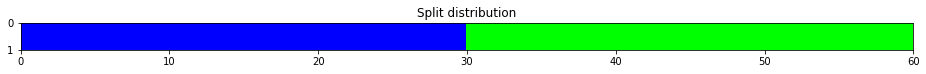

X      - shape: (60, 570)  type: ndarray  dtype:float32  isnan: 0
y      - shape: (60,)  type: ndarray  dtype:<U1  n_classes: 4 (15 samples per class) ['1', '2', '3', '4']  isnan: False
splits - n_splits: 2 shape: [30, 30]  overlap: [False]


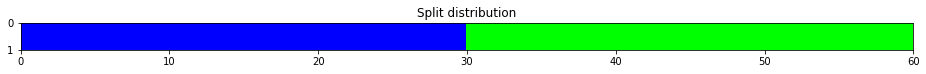

X      - shape: [60 samples x 1 features x 570 timesteps]  type: ndarray  dtype:float32  isnan: 0
y      - shape: (60,)  type: ndarray  dtype:float32  isnan: 0
splits - n_splits: 2 shape: [30, 30]  overlap: [False]


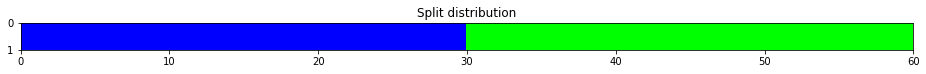

X      - shape: (60, 570)  type: ndarray  dtype:float32  isnan: 0
y      - shape: (60,)  type: ndarray  dtype:float32  isnan: 10
splits - n_splits: 2 shape: [30, 30]  overlap: [False]


/Users/nacho/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:21: UserWarning: y must not contain nan values


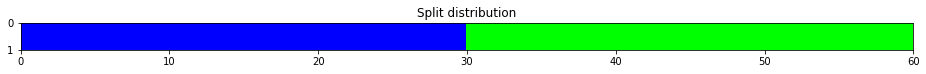

X      - shape: [60 samples x 1 features x 570 timesteps]  type: ndarray  dtype:float32  isnan: 0
y      - shape: (60,)  type: ndarray  dtype:<U1  n_classes: 4 (15 samples per class) ['1', '2', '3', '4']  isnan: False
splits - n_splits: 3 shape: [[40, 20], [40, 20], [40, 20]]  overlap: [False, False, False]


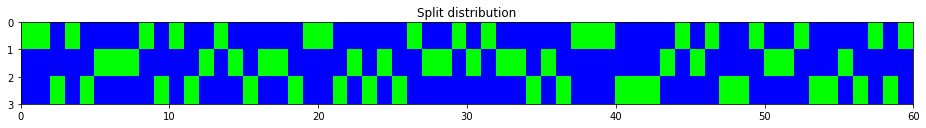

X      - shape: (60, 570)  type: ndarray  dtype:float32  isnan: 0
y      - shape: (60,)  type: ndarray  dtype:<U1  n_classes: 4 (15 samples per class) ['1', '2', '3', '4']  isnan: False
splits - n_splits: 3 shape: [[40, 20], [40, 20], [40, 20]]  overlap: [False, False, False]


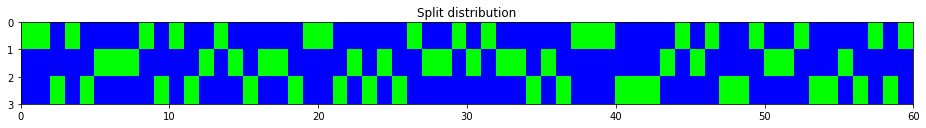

X      - shape: (60, 570)  type: ndarray  dtype:float32  isnan: 0
y      - shape: (60,)  type: ndarray  dtype:<U1  n_classes: 5 (12 samples per class) ['1', '2', '3', '4', 'n']  isnan: False
splits - n_splits: 3 shape: [[40, 20], [40, 20], [40, 20]]  overlap: [False, False, False]


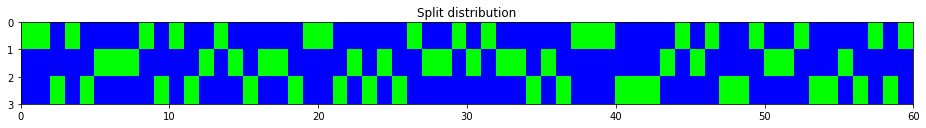

In [ ]:
dsid = 'OliveOil'
X, y, splits = get_UCR_data(dsid, split_data=False, on_disk=False, force_download=True)
check_data(X, y, splits)
check_data(X[:, 0], y, splits)
y = y.astype(np.float32)
check_data(X, y, splits)
y[:10] = np.nan
check_data(X[:, 0], y, splits)
X, y, splits = get_UCR_data(dsid, split_data=False, on_disk=False, force_download=True)
splits = get_splits(y, 3)
check_data(X, y, splits)
check_data(X[:, 0], y, splits)
y[:5]= np.nan
check_data(X[:, 0], y, splits)
X, y, splits = get_UCR_data(dsid, split_data=False, on_disk=False, force_download=True)

In [ ]:
#hide
out = create_scripts()
beep(out)